In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:\AI\csv\CustomerActivity.csv')

In [4]:
data.head()

,ActivityID,CustomerID,Date,EventType
0,0,11004,20-01-2003 00:00,Car Sale
1,1,11004,05-07-2003 00:00,Service - Neutral
2,2,11004,23-09-2003 00:00,Service - Happy
3,3,11006,31-01-2004 00:00,Car Sale
4,4,11006,15-07-2004 00:00,Service - Neutral


In [5]:
data.drop(['ActivityID'], axis = 1, inplace = True)

In [6]:
data.head()

,CustomerID,Date,EventType
0,11004,20-01-2003 00:00,Car Sale
1,11004,05-07-2003 00:00,Service - Neutral
2,11004,23-09-2003 00:00,Service - Happy
3,11006,31-01-2004 00:00,Car Sale
4,11006,15-07-2004 00:00,Service - Neutral


In [9]:
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [13]:
data.head()

,CustomerID,Date,EventType,Year
0,11004,20-01-2003 00:00,Car Sale,2003
1,11004,05-07-2003 00:00,Service - Neutral,2003
2,11004,23-09-2003 00:00,Service - Happy,2003
3,11006,31-01-2004 00:00,Car Sale,2004
4,11006,15-07-2004 00:00,Service - Neutral,2004


In [14]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [16]:
data.head()

,CustomerID,Date,EventType,Year,Month
0,11004,20-01-2003 00:00,Car Sale,2003,1
1,11004,05-07-2003 00:00,Service - Neutral,2003,5
2,11004,23-09-2003 00:00,Service - Happy,2003,9
3,11006,31-01-2004 00:00,Car Sale,2004,1
4,11006,15-07-2004 00:00,Service - Neutral,2004,7


In [17]:
data.drop(['Date'], axis=1, inplace = True)

In [18]:
data.head()

,CustomerID,EventType,Year,Month
0,11004,Car Sale,2003,1
1,11004,Service - Neutral,2003,5
2,11004,Service - Happy,2003,9
3,11006,Car Sale,2004,1
4,11006,Service - Neutral,2004,7


In [35]:
data.EventType.describe()

count                 49517
unique                    5
top       Service - Neutral
freq                  15122
Name: EventType, dtype: object

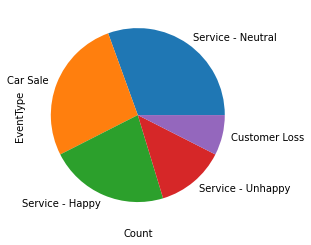

In [26]:
data.EventType.value_counts()

data.EventType.value_counts().plot.pie()
plt.title('')
plt.xlabel('Count')
plt.ylabel('EventType')
plt.show()

<AxesSubplot:xlabel='EventType', ylabel='Count'>

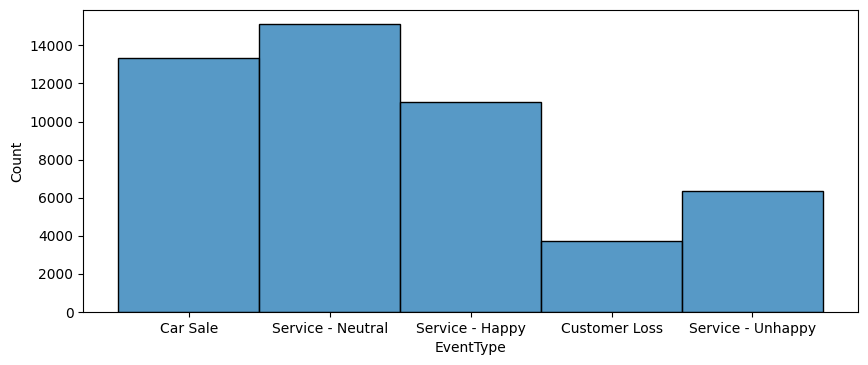

In [39]:
data.EventType.describe()
plt.figure(figsize=(10,4),dpi=100)
sns.histplot(data = data,x='EventType')

In [50]:
data['EventType'].value_counts()

Service - Neutral    15122
Car Sale             13341
Service - Happy      11003
Service - Unhappy     6348
Customer Loss         3703
Name: EventType, dtype: int64

In [37]:
data.Year.describe()

count    49517.000000
mean      2004.144294
std          1.101703
min       2002.000000
25%       2003.000000
50%       2004.000000
75%       2005.000000
max       2008.000000
Name: Year, dtype: float64

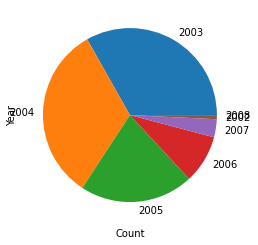

In [38]:
data.Year.value_counts()

data.Year.value_counts().plot.pie()
plt.title('')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Count'>

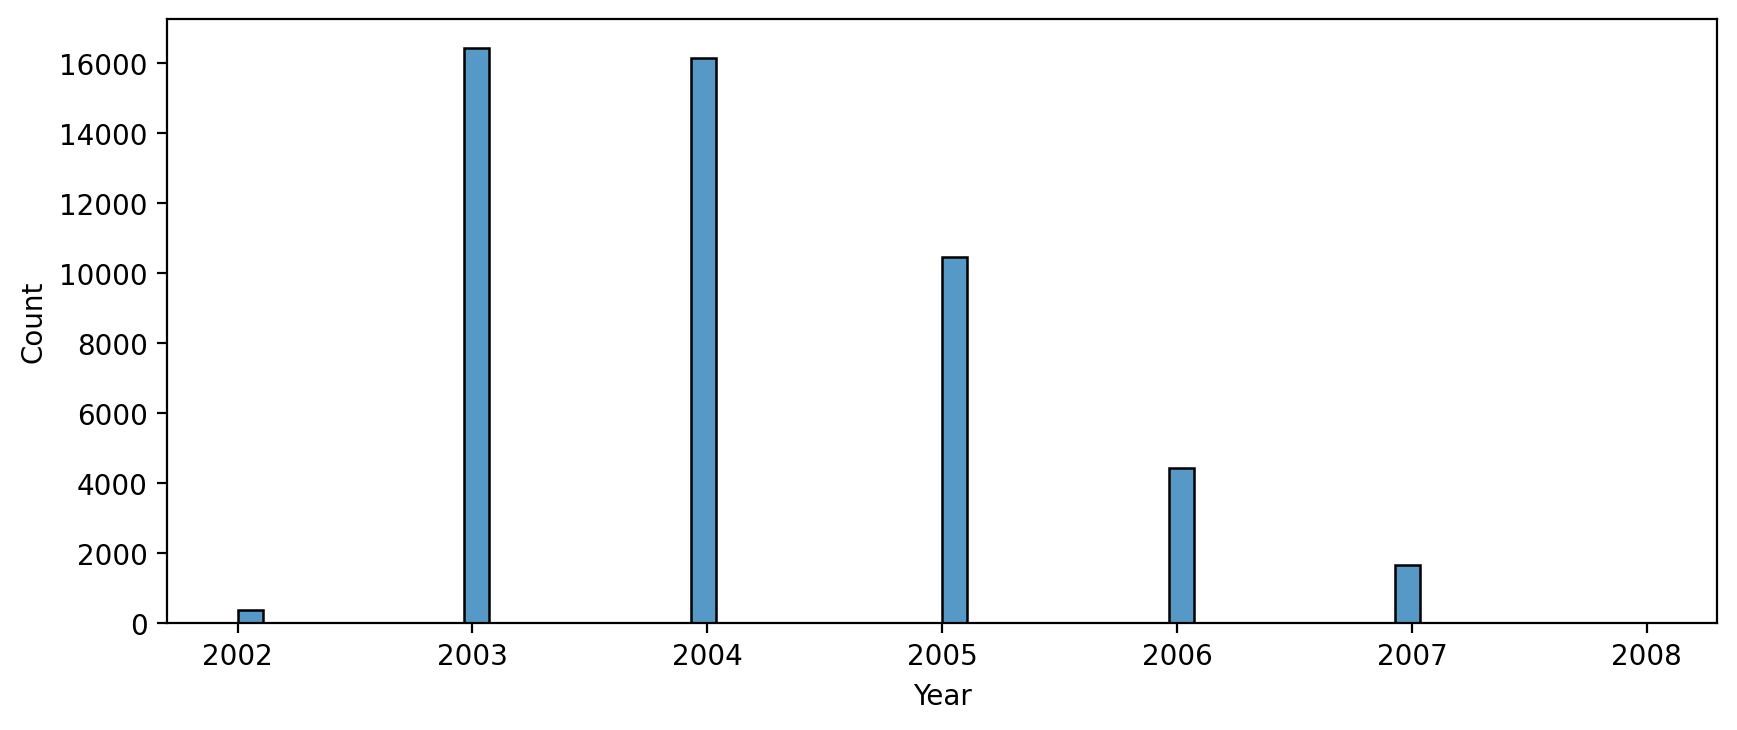

In [41]:
data.Year.describe()
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = data,x='Year')

In [48]:
data['Year'].value_counts()

2003    16429
2004    16151
2005    10455
2006     4444
2007     1659
2002      377
2008        2
Name: Year, dtype: int64

In [42]:
data.Month.describe()

count    49517.000000
mean         6.405154
std          3.426916
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: Month, dtype: float64

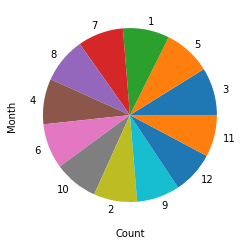

In [43]:
data.Month.value_counts()

data.Month.value_counts().plot.pie()
plt.title('')
plt.xlabel('Count')
plt.ylabel('Month')
plt.show()

<AxesSubplot:xlabel='Month', ylabel='Count'>

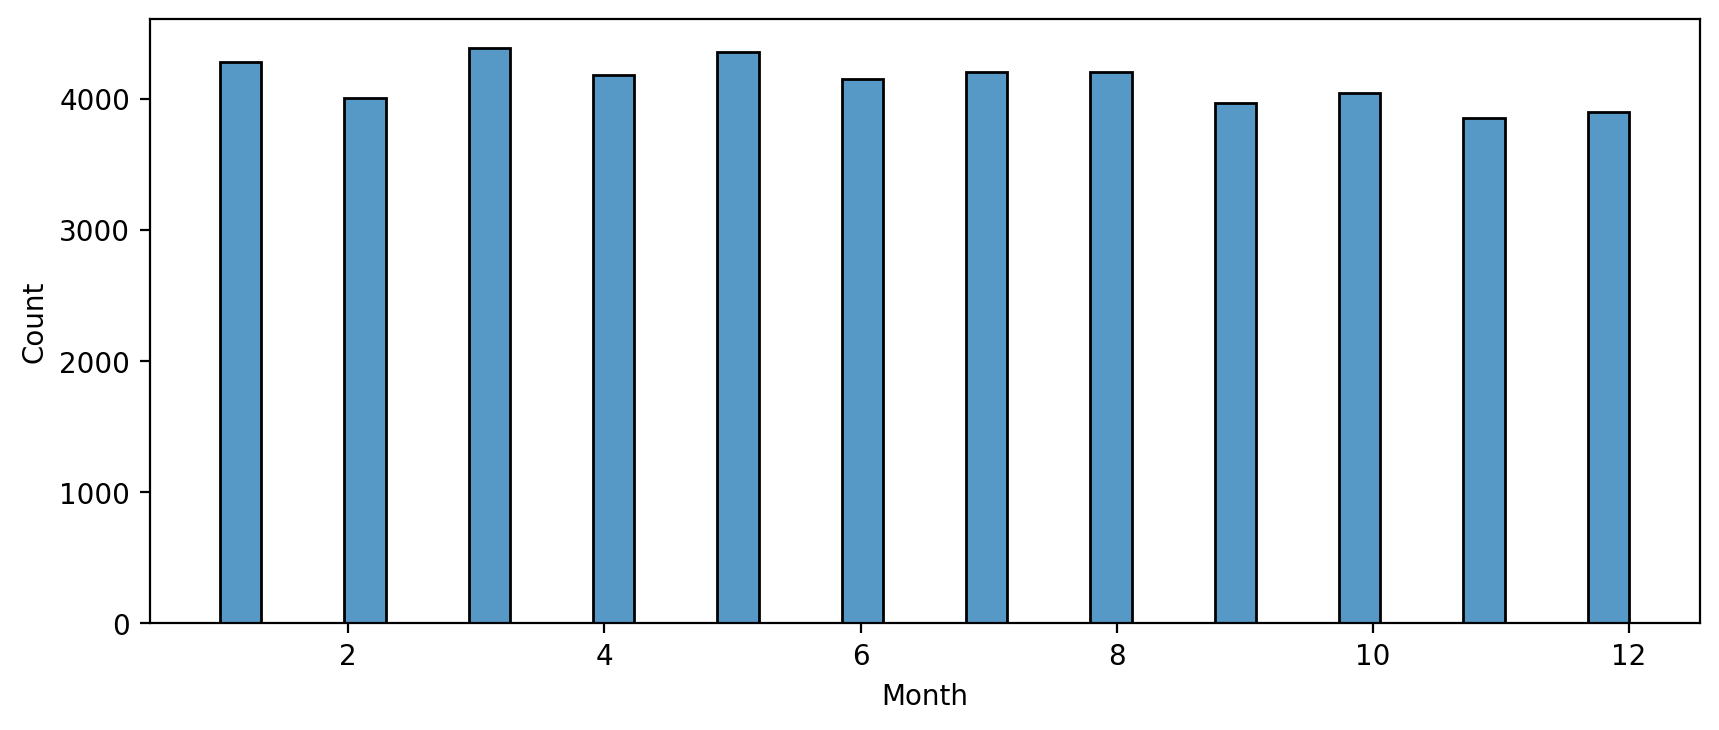

In [45]:
data.Month.describe()
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data = data,x='Month')

In [51]:
data['Month'].value_counts()

3     4384
5     4352
1     4279
7     4204
8     4201
4     4181
6     4152
10    4045
2     4003
9     3965
12    3899
11    3852
Name: Month, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [54]:
data.corr()

,CustomerID,Year,Month
CustomerID,1.000000,-0.056174,0.000273
Year,-0.056174,1.000000,-0.096696
Month,0.000273,-0.096696,1.000000


<AxesSubplot:>

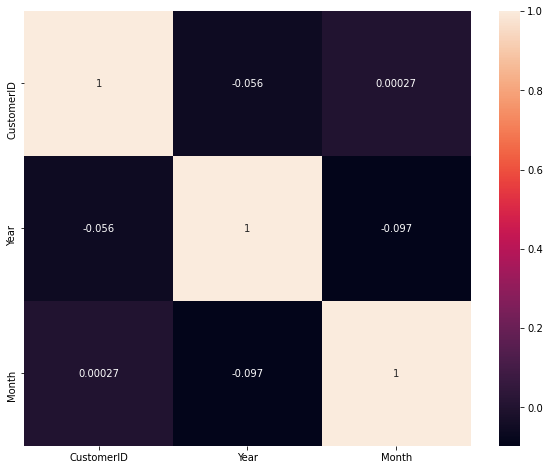

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True)

In [59]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
data['EventType'] = label_encoding.fit_transform(data['EventType'].astype(str))

data.head()

,CustomerID,EventType,Year,Month
0,11004,0,2003,1
1,11004,3,2003,5
2,11004,2,2003,9
3,11006,0,2004,1
4,11006,3,2004,7


<AxesSubplot:>

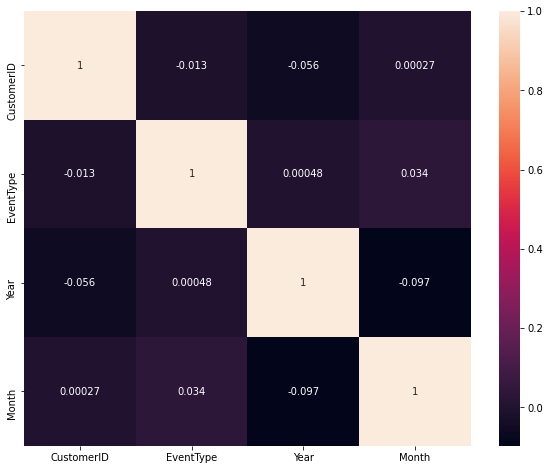

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True)

Text(0.5, 1.0, 'Correlation Heatmap')

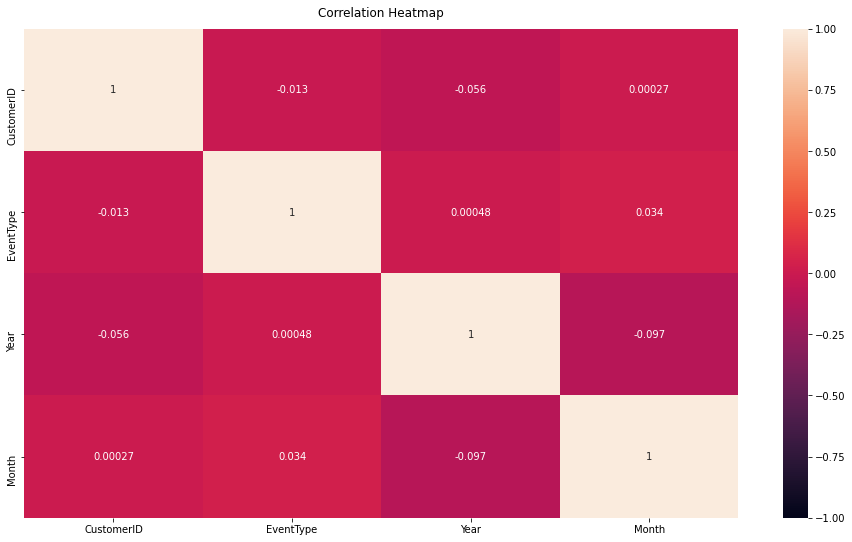

In [61]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)